In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
import math
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline 
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('Offenses known 2013.csv', skiprows=4)

In [3]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [4]:
df.head(20)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [5]:
# Check what type of data I have.
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [6]:
# Rename murder to a more convenient name.
df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df['Property_Crime'] = df['Property\ncrime']

# first remove the commas 
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Property_Crime'] = df['Property_Crime'].str.replace(',', '')

In [7]:
# change robbery, and population to int.
df[['Robbery', 'Population', 'Murder']] = df[['Robbery', 'Population', 'Murder']].apply(pd.to_numeric)

In [8]:
# Make population squared.
df['Popsqrd'] = df['Population'] * df['Population']

In [9]:
# Remove the Nan and show that my data is now useable. 
print(df[['City', 'Population', 'Popsqrd', 'Murder', 'Robbery' ]].dropna())

                           City  Population         Popsqrd  Murder  Robbery
0                 Adams Village    1861.000     3463321.000   0.000    0.000
1      Addison Town and Village    2577.000     6640929.000   0.000    0.000
2                 Akron Village    2846.000     8099716.000   0.000    0.000
3                        Albany   97956.000  9595377936.000   8.000  227.000
4                Albion Village    6388.000    40806544.000   0.000    4.000
5                Alfred Village    4089.000    16719921.000   0.000    3.000
6              Allegany Village    1781.000     3171961.000   0.000    0.000
7                  Amherst Town  118296.000 13993943616.000   1.000   31.000
8            Amityville Village    9519.000    90611361.000   0.000    4.000
9                     Amsterdam   18182.000   330585124.000   0.000   12.000
10               Arcade Village    2053.000     4214809.000   0.000    0.000
11              Ardsley Village    4523.000    20457529.000   0.000    3.000

# U2 L4 P4 Challenge: Make My Own Regression Model
Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [10]:
# Make violent crime a usable stat. Get rid of the commas.
df['Violent_Crime'] = df['Violent\ncrime'].str.replace(',', '')
# Turn Violent Crime into an int.
df['Violent_Crime'] = df['Violent_Crime'].apply(pd.to_numeric)
# Turn Property Crime into an int. Already transformed it up top in an earlier cell.
df['Property_Crime'] = df['Property_Crime'].apply(pd.to_numeric)



In [11]:
# Make sure that all the data that I've selected is usable. 
data = df[['Murder', 'Robbery', 'Population', 'Violent_Crime', 'Property_Crime']].dropna()

In [12]:
# Attempting to clean the data a bit before using it.
data.describe()

,Murder,Robbery,Population,Violent_Crime,Property_Crime
count,348.000,348.000,348.000,348.000,348.000
mean,1.566,72.902,40037.632,201.595,792.606
std,18.304,1031.033,450037.368,2815.269,7659.725
min,0.000,0.000,526.000,0.000,0.000
25%,0.000,0.000,3003.000,2.000,40.500
50%,0.000,1.000,7233.500,6.000,112.500
75%,0.000,5.000,18427.500,22.000,341.000
max,335.000,19170.000,8396126.000,52384.000,141971.000


- Noticed that murder and robbery have an insanely large range, so I will change them both into categorical variables to see what happens.
- Changing either of them to booleans gave me the R^2 value of (-.013). Will dismiss and use something else.
- Dropping row 216 lowered the R^2 so maybe allowing less outliers will reduce overfitting.

In [13]:
# data['Murder_cat'] = np.where(data.loc[:, 'Murder']>=0, 1, 0) 
# data['Robbery_cat'] = np.where(data.loc[:, 'Robbery']>=0, 1, 0) 
# Remove the outlier in Robbery
# print(data[data['Robbery'] > 5000]) only row 216. remove
data = data.drop([216])

(array([285.,  44.,   6.,   7.,   1.,   1.,   0.,   1.,   1.,   1.]),
 array([   526. ,  26352.3,  52178.6,  78004.9, 103831.2, 129657.5,
        155483.8, 181310.1, 207136.4, 232962.7, 258789. ]),
 <a list of 10 Patch objects>)

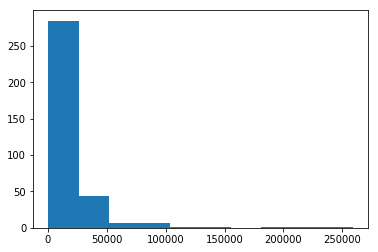

In [14]:
# Control for population 
plt.hist(data['Population']) 

In [15]:
data = data.query('Population<65000')

Most population counts aren't over 50k but I will use up to 65k to account for some of the outliers.

In [16]:
data.describe()

,Murder,Robbery,Population,Violent_Crime,Property_Crime
count,333.000,333.000,333.000,333.000,333.000
mean,0.219,6.712,11634.640,22.399,244.967
std,0.917,21.581,12375.324,60.894,368.681
min,0.000,0.000,526.000,0.000,0.000
25%,0.000,0.000,2846.000,2.000,38.000
50%,0.000,1.000,6794.000,6.000,107.000
75%,0.000,4.000,15374.000,18.000,313.000
max,10.000,204.000,61686.000,584.000,2807.000


Hopefully, this time around things might look better.

# Model 1

In [17]:
# Model with just X and Y were grossly overfitted. Must fix
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property_Crime'].values.reshape(-1, 1)
X = data[['Population','Robbery','Violent_Crime', 'Murder']]
# Square the parameters so that we can achieve homoscedasticity.
data['Robbery Sqrd'] = data['Robbery'] * data['Robbery']
data['Violent Crime Sqrd'] = data['Violent_Crime'] * data['Violent_Crime']
data['Murder Sqrd'] = data['Murder'] * data['Murder']
data['Population Sqrd'] = data['Population'] * data['Population']
data['Property Crime Sqrd'] = data['Property_Crime'] * data['Property_Crime']
 

X2 = data[['Robbery Sqrd', 'Violent Crime Sqrd', 'Murder Sqrd', 'Population Sqrd']]
Y2 = data['Property Crime Sqrd'].values.reshape(-1, 1)

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.62739387e-02 -7.50619365e+00  6.02236144e+00 -5.82503701e+01]]

Intercept: 
 [-16.12271574]

R-squared:
0.8263741107495083


Controlling for outliers proved to be a better way of achieving an explained variance score that isn't overfitted. 

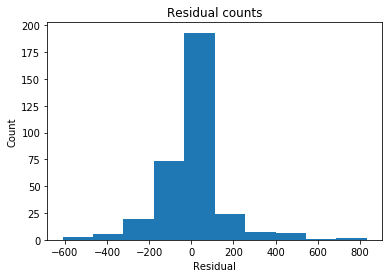

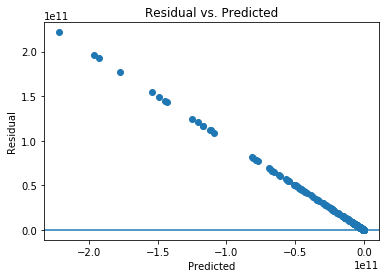

In [18]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Property_Crime']

# Calculate the error, aka residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Use the square values of the features to achieve homoskedasticity
predicted2 = regr.predict(X2).ravel()
residual2 = actual - predicted2

plt.scatter(predicted2, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


- Lowering the population count from 75k to 65k made only a slight difference in my actual vs predicted plot.
- Removing outliers allowed my model to resemble more closely to the multivariate normality assumption.
- My regression model is more homoskedastic now, but it's in a descending manner instead of ascending manner.
- I chose to use population, robbery, murder, and violent crimes because I thought those would be the things that had the biggest correlation with property crime. 
- After removing outliers, my model isn't as overfitted and can supposedly evaluate 82% of the variance within the model. 

# Cross Fold Validation

I will attempt to see if any of my variables are overfitting now. 

In [19]:
model = regr.fit(X, Y)

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, Y, cv=5)

array([0.81216744, 0.54001992, 0.78535785, 0.69236108, 0.88903254])

I ran a cross fold validation on my data. It ranges a lot but it seems that none of my variables are overfitting too much. 

# Challenge U2 L5 P2: Validating a Linear Regression

Based on the results of your validation test, create a revised model, and then test both old and new models on a new holdout or set of folds.

Include your model(s) and a brief writeup of the reasoning behind the validation method you chose and the changes you made to submit and review with your mentor.

In [20]:
# Already ran a cross validation on my initial model.
#  Find the p value 
linear_formula = 'Property_Crime ~ Population+Robbery+Violent_Crime+Murder'

# Fit the model to our data using the formula. 
lm = smf.ols(formula=linear_formula, data=data).fit()
# Model one results are
print(lm.params)

Intercept       -16.123
Population        0.016
Robbery          -7.506
Violent_Crime     6.022
Murder          -58.250
dtype: float64


In [21]:
lm.pvalues

Intercept       0.180
Population      0.000
Robbery         0.000
Violent_Crime   0.000
Murder          0.000
dtype: float64

- From the p-values, it tells me that none of my features have an effect on the model and that dropping them would not affect my R^2 value. 
- This is strange for me. I suppose I will change out some of the variables. 

In [22]:
print(lm.rsquared)

0.8263741107495084


# Model 2 

In [23]:
df2 = pd.read_excel('Offenses known 2014.xls', skiprows=4)

In [24]:
df2.head()
# data cleaning again.

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000


In [25]:
df2.dtypes
# The good thing about an excel file is that it's all in float form at least.

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [26]:
# Rename like before
df2['Murder'] = df2['Murder and\nnonnegligent\nmanslaughter']
df2['Violent_Crime'] = df2['Violent\ncrime']
df2['Property_Crime'] = df2['Property\ncrime']

In [27]:
data2 = df2[['Murder', 'Robbery', 'Population', 'Violent_Crime', 'Property_Crime']].dropna()

In [28]:
df2.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,Violent_Crime,Property_Crime
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,0.000,0.000,11.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,0.000,2.000,49.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,0.000,1.000,17.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,8.000,802.000,3888.000


In [29]:
data2.describe()

,Murder,Robbery,Population,Violent_Crime,Property_Crime
count,368.000,368.000,368.000,368.000,368.000
mean,1.457,60.823,37888.399,184.179,698.361
std,17.718,867.655,441757.416,2642.418,7123.614
min,0.000,0.000,79.000,0.000,0.000
25%,0.000,0.000,2628.250,1.000,25.000
50%,0.000,1.000,6564.500,5.000,76.000
75%,0.000,4.000,15534.750,18.250,271.500
max,333.000,16581.000,8473938.000,50564.000,135747.000


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


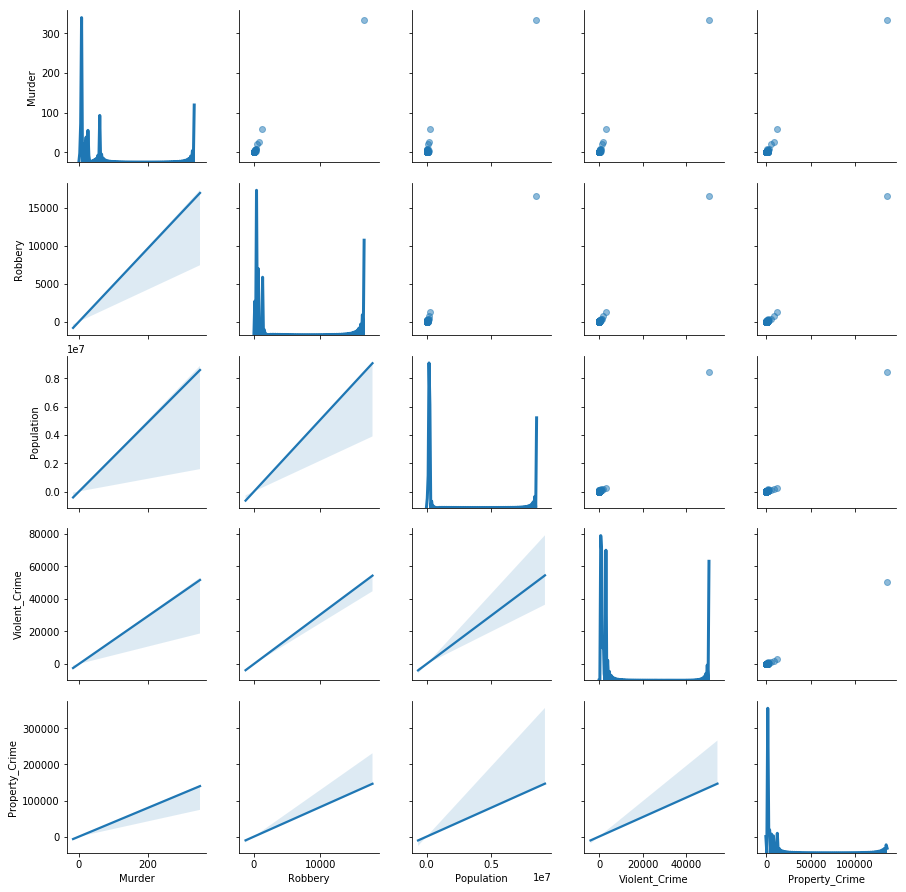

In [30]:
# Scatterplot matrix
g = sns.PairGrid(data2, diag_sharey=False)

#Scatterplots
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing linear relationship of two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Univariate distribtuion of the variables
g.map_diag(sns.kdeplot, lw=3)

plt.show()

(array([367.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([7.9000000e+01, 8.4746490e+05, 1.6948508e+06, 2.5422367e+06,
        3.3896226e+06, 4.2370085e+06, 5.0843944e+06, 5.9317803e+06,
        6.7791662e+06, 7.6265521e+06, 8.4739380e+06]),
 <a list of 10 Patch objects>)

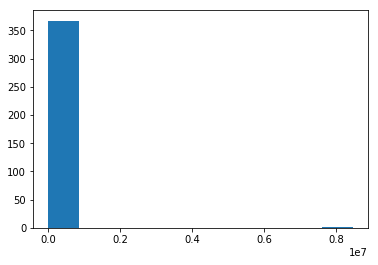

In [33]:
# Control for population.
plt.hist(data2['Population'])

In [34]:
# Copying prior parameters.
data2 = data2.query('Population<65000')

In [37]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Yn = data['Property_Crime'].values.reshape(-1, 1)
Xn = data[['Population','Robbery','Violent_Crime', 'Murder']]
# Square the parameters so that we can achieve homoscedasticity.
data['Robbery Sqrd'] = data['Robbery'] * data['Robbery']
data['Violent Crime Sqrd'] = data['Violent_Crime'] * data['Violent_Crime']
data['Murder Sqrd'] = data['Murder'] * data['Murder']
data['Population Sqrd'] = data['Population'] * data['Population']
data['Property Crime Sqrd'] = data['Property_Crime'] * data['Property_Crime']
 

Xn2 = data[['Robbery Sqrd', 'Violent Crime Sqrd', 'Murder Sqrd', 'Population Sqrd']]
Yn2 = data['Property Crime Sqrd'].values.reshape(-1, 1)

regr.fit(Xn, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(Xn, Y))


Coefficients: 
 [[ 1.62739387e-02 -7.50619365e+00  6.02236144e+00 -5.82503701e+01]]

Intercept: 
 [-16.12271574]

R-squared:
0.8263741107495083


New data is fitting pretty well on the old model so far. 

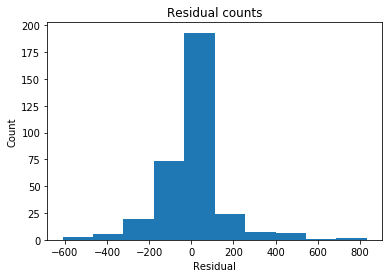

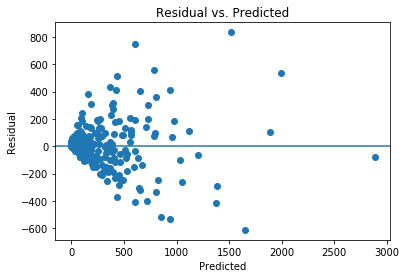

In [42]:
# Extract predicted values.
predicted = regr.predict(Xn).ravel()
actual = data['Property_Crime']

# Calculate the error, aka residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Use the square values of the features to achieve homoskedasticity
predicted2 = regr.predict(Xn).ravel()
residual2 = actual - predicted2

plt.scatter(predicted2, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

- The distribution is almost normal. There are a few outliers.
- The plot isn't homoscedastic but at least it shows an upward trend. I'm sure that if I square the data I'll get a more homoscedastic plot.

In [38]:
# Already ran a cross validation on my initial model.
#  Find the p value 
linear_formula2 = 'Property_Crime ~ Population+Violent_Crime+Robbery+Murder'

# Fit the model to our data using the formula. 
lm2 = smf.ols(formula=linear_formula2, data=data2).fit()
# Model one results are
print(lm2.params)

Intercept       -20.939
Population        0.015
Violent_Crime     6.035
Robbery         -11.413
Murder           45.121
dtype: float64


In [39]:
print(lm2.pvalues)
print(lm2.rsquared)

Intercept       0.054
Population      0.000
Violent_Crime   0.000
Robbery         0.000
Murder          0.007
dtype: float64
0.8206566546261891


Murder is a significant coefficient in this new dataset. Progress!

In [40]:
lm2.conf_int()

,0,1
Intercept,-42.249,0.371
Population,0.013,0.017
Violent_Crime,5.190,6.879
Robbery,-14.042,-8.783
Murder,12.507,77.735


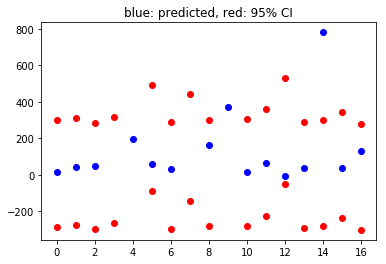

In [41]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm2)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

- The model has only a bit of outliers but the distribution looks normal.
- The homoscedasticity at least shows an upward trend this time but there are outliers here too.

In [43]:
# Cross Validation
modeln = regr.fit(Xn, Y)

from sklearn.model_selection import cross_val_score
cross_val_score(modeln, Xn, Y, cv=5)

array([0.81216744, 0.54001992, 0.78535785, 0.69236108, 0.88903254])

My new model data doesn't overfit on any particular variable which is good.

- Model 2 is about as accurate as Model 1. 
- My model 2 is almost multivariate normal in terms of the distribution but there is an outlier.
- My model 2 is also closer to homoscedasticity this time without me even having to use the square values to create it.
- Lastly, I actually have a significant coefficient in model 2 compared to model 1.